# Testing plots

In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D


In [13]:
df = pd.read_csv('/Users/danieljurg/data-mirror-3.0/extended_youtube_data.csv')

In [14]:
df.head(10)

,video_title,video_url,timestamp,channel,channel_url,year
0,If Metro Boomin Sampled Jordan Belfort Instead...,https://www.youtube.com/watch?v=dMJpXljFo9E,2024-05-24,Nick Scott,https://www.youtube.com/channel/UClgFNgZFo18fi...,2024
1,The Brutal Reality of the Middle East | Mosab ...,https://www.youtube.com/watch?v=I5VPFw0vI6U,2024-05-24,Jordan B Peterson,https://www.youtube.com/channel/UCL_f53ZEJxp8T...,2024
2,Full English 🍳 #shorts,https://www.youtube.com/watch?v=2esEvMSmOCE,2024-05-24,Andy Cooks,https://www.youtube.com/channel/UCqNkn5PNeSqbQ...,2024
3,Have you ever met a butcher that orders his st...,https://www.youtube.com/watch?v=7gBHqsOdjtA,2024-05-24,Mario’s Meats & Deli,https://www.youtube.com/channel/UCvfHuKnmWZnTY...,2024
4,The disRICEpect 😒🍚🇵🇭#filipino#filipinocomedy#s...,https://www.youtube.com/watch?v=YJTE6Fodprg,2024-05-24,Cherish Del Rosario,https://www.youtube.com/channel/UCJFrizo-ooVu6...,2024
5,Exploring the Oceans | NatGeo,https://www.youtube.com/watch?v=oceanNatGeo,2023-06-15,National Geographic,https://www.youtube.com/channel/UCnatGeo,2023
6,The Psychology of Success | Tony Robbins,https://www.youtube.com/watch?v=tonyRobbinsSuc...,2023-06-15,Tony Robbins,https://www.youtube.com/channel/UCTonyRobbins,2023
7,AI and the Future of Work | Sam Harris,https://www.youtube.com/watch?v=samHarrisAI,2023-06-15,Andy Cooks,https://www.youtube.com/channel/UCSamHarrisAI,2023
8,Best Cooking Hacks #foodie #chef,https://www.youtube.com/watch?v=bestCookingHacks,2023-06-15,The Food Channel,https://www.youtube.com/channel/UCFoodChannel,2023
9,Creative Coding | Python for Beginners,https://www.youtube.com/watch?v=codingPython,2023-06-15,Code Academy,https://www.youtube.com/channel/UCCodeAcademy,2023


In [15]:
# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by 'year' and 'channel' and calculate the count of videos per channel per year
channel_ranking = df.groupby(['year', 'channel']).size().reset_index(name='view_counts')

# Rank channels per year based on 'view_counts'
channel_ranking['rank'] = channel_ranking.groupby('year')['view_counts'].rank(ascending=False, method='first').astype(int)

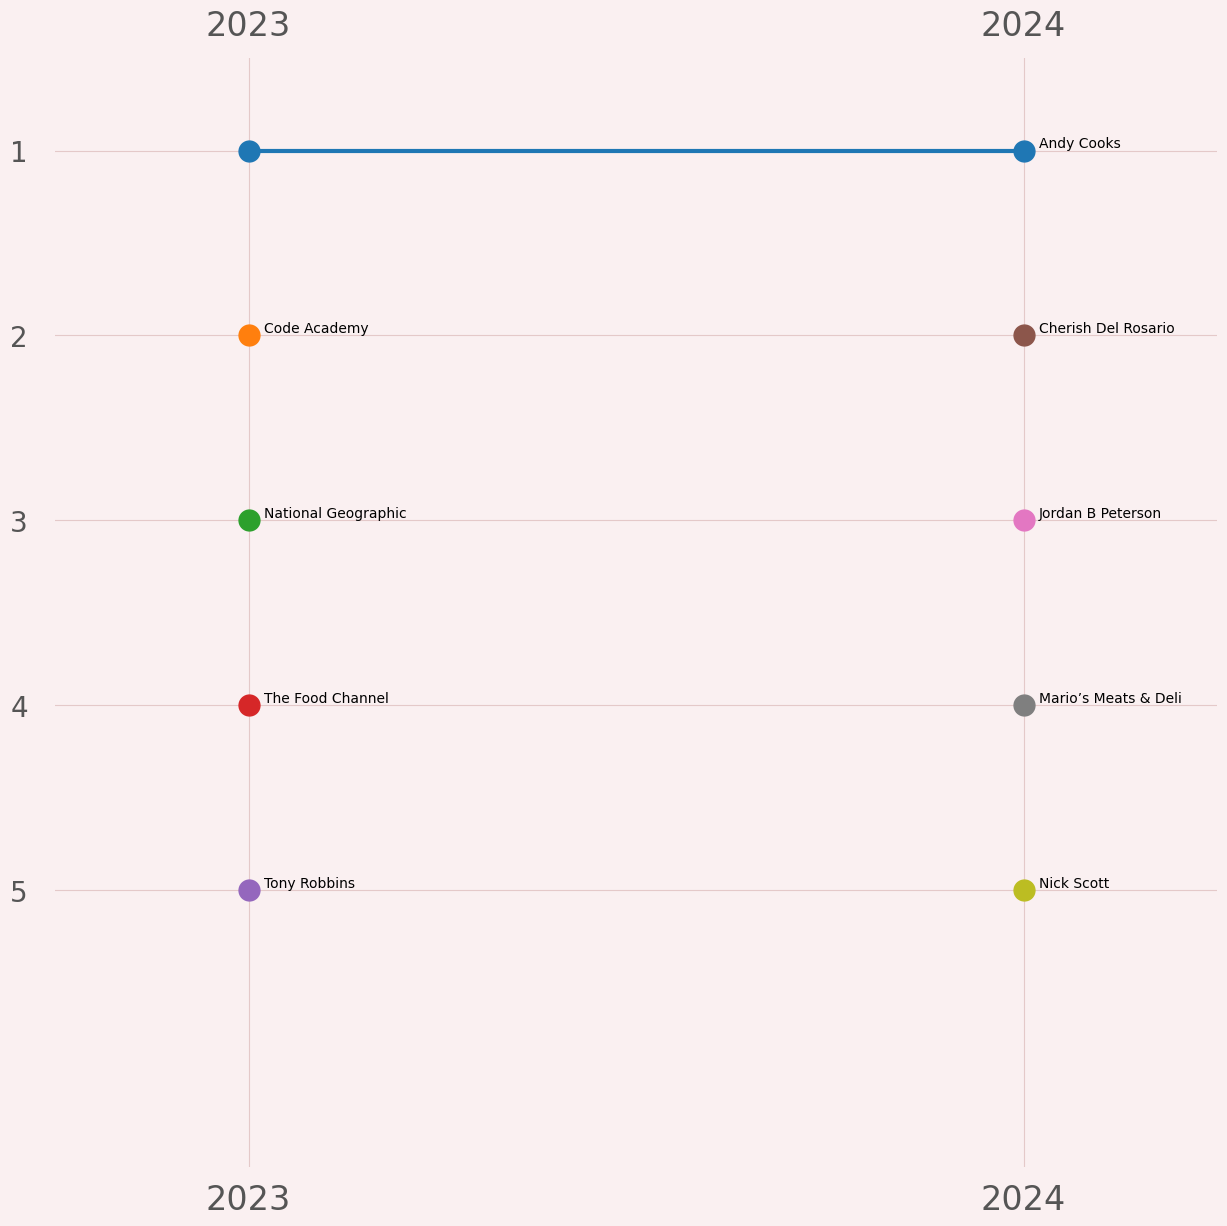

In [24]:
def add_line(ax, year_values, rank_values, linewidth=3, color="black"):
    # Plot line connecting points
    ax.add_artist(Line2D(year_values, -rank_values, linewidth=linewidth, color=color))

def add_circle(ax, year_value, rank_value, marker_size=15, color="black"):
    # Plot circle for single year data
    ax.plot(year_value, -rank_value, 'o', color=color, markersize=marker_size)

def add_text(ax, year_value, rank_value, text, offset=0.02):
    # Add text label next to the point
    ax.text(year_value + offset, -rank_value, text, fontsize=10, va='bottom', ha='left')

def format_ticks(ax, years, padx=0.25, pady=0.1, y_label_size=16, x_label_size=18):
    ax.set(xlim=(-padx, len(years) - 1 + padx), ylim=(-1.5 - pady, -0.5 - pady))  # Further compress the y-axis

    xticks = [i for i in range(len(years))]
    ax.set_xticks(ticks=xticks, labels=years)

    yticks = [-i for i in range(1, 2)]  # Assuming a single rank for now
    ylabels = ["{}".format(i) for i in range(1, 2)]
    ax.set_yticks(ticks=yticks, labels=ylabels)

    ax.tick_params("y", labelsize=y_label_size, pad=8)  # Reduce padding further
    ax.tick_params("x", labeltop=True, labelsize=x_label_size, pad=4)

# Define a custom background and color styling
def set_custom_style():
    plt.rcParams.update({
        "axes.facecolor": "#FAF0F1",  # Background color
        "figure.facecolor": "#FAF0F1",
        "grid.color": "#E4C9C9",
        "axes.grid": True,
        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "axes.spines.right": False,
        "axes.spines.top": False
    })

# Apply the custom styling
set_custom_style()

# Extract years and ranks for each channel and plot the lines
channels = channel_ranking['channel'].unique()

# Create chart
years = sorted(channel_ranking['year'].unique())  # List of years to plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3.5 * len(channels)))
format_ticks(ax, years)

# Define some colors for differentiation (or you can use the same color for simplicity)
colors = plt.get_cmap("tab10").colors

# Draw lines or circles for each channel
for i, channel in enumerate(channels):
    # Select the data for each channel across the years
    channel_data = channel_ranking[channel_ranking['channel'] == channel]
    
    # Ensure the years and ranks align with the plotting
    year_values = [years.index(year) for year in channel_data['year']]  # x-axis values (positions of the years)
    rank_values = channel_data['rank'].values  # y-axis values (rankings)
    
    color = colors[i % len(colors)]  # Choose a different color for each channel

    if len(year_values) > 1:
        # Draw a line if the channel has data in more than one year
        add_line(ax, year_values, rank_values, color=color)
        # Add a circle for each point and the text for the last point
        for j, year in enumerate(year_values):
            add_circle(ax, year, rank_values[j], color=color)
        add_text(ax, year_values[-1], rank_values[-1], channel)
    else:
        # Draw a circle if the channel only has data in one year
        add_circle(ax, year_values[0], rank_values[0], color=color)
        # Add text next to the circle
        add_text(ax, year_values[0], rank_values[0], channel)

plt.show()

In [ ]:
def format_ticks(ax, years, padx=0.25, pady=0.5, y_label_size=20, x_label_size=24):
    ax.set(xlim=(-padx, len(years) - 1 + padx), ylim=(-len(df['channel'].unique()) - pady, -pady))

    xticks = [i for i in range(len(years))]
    ax.set_xticks(ticks=xticks, labels=years)

    yticks = [-i for i in range(1, len(df['channel'].unique()) + 1)]
    ylabels = ["{}".format(i) for i in range(1, len(df['channel'].unique()) + 1)]
    ax.set_yticks(ticks=yticks, labels=ylabels)

    ax.tick_params("y", labelsize=y_label_size, pad=16)
    ax.tick_params("x", labeltop=True, labelsize=x_label_size, pad=8)


In [ ]:
def add_line(ax, row, years, rank_columns, linewidth=3):
    x = [i for i in range(len(years))]  # X-axis is the index of years
    y = [-row[rank_column] for rank_column in rank_columns]  # Y-axis is the negative rank values (to invert)
    
    # Plot each line
    ax.add_artist(Line2D(x, y, linewidth=linewidth, color="black"))

def format_ticks(ax, years, padx=0.25, pady=0.5, y_label_size=20, x_label_size=24):
    ax.set(xlim=(-padx, len(years) -1 + padx), ylim=(-6 - pady, -pady))  # Adjust the ylim based on number of channels
    
    xticks = [i for i in range(len(years))]
    ax.set_xticks(ticks=xticks, labels=years)

    yticks = [-i for i in range(1, 6)]  # Assuming rank values from 1 to 5
    ylabels = ["{}".format(i) for i in range(1, 6)]
    ax.set_yticks(ticks=yticks, labels=ylabels)

    ax.tick_params("y", labelsize=y_label_size, pad=16)
    ax.tick_params("x", labeltop=True, labelsize=x_label_size, pad=8)

# Sample rank_columns for 2 years (e.g., 2023 and 2024)
rank_columns = ['rank_2023', 'rank_2024']

# Check if the data in channel_ranking is valid
print(channel_ranking.head())  # Ensure that rank data is available for 2023 and 2024

# Create chart
years = ['2023', '2024']  # Adjust this to match the years in your data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 1.6 * len(channel_ranking['channel'].unique())))
format_ticks(ax, years)

# Draw lines for each row (i.e., each channel)
for i, row in channel_ranking.iterrows():
    add_line(ax, row, years, rank_columns)

plt.show()